<a href="https://colab.research.google.com/github/Mihirgupta2001/Regression---Capstone-Project/blob/main/Regresssion_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing neccesary libraries
!pip install --upgrade mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 71 kB 3.9 MB/s 


In [2]:
# importing the neccesary libraries
import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [3]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/data_YesBank_StockPrices.csv')

In [5]:
#Check for null values and value types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


There are no null values in the dataset, also the Date column is in string format

Let's move ahead and check other parameters

In [6]:
# Checking the description of the data
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


We can see that mean, standard deviation and all other parameters are close to each other in all the columns, which kind of obvious given each column is a part of candlestick pattern 

In [7]:
# Taking a look at our given dataset
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [8]:
# Changing the format of date 
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y'))
df['Date'] = df['Date'].dt.strftime('%Y-%m')
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [9]:
# Setting Date as index
df = df.set_index('Date')
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


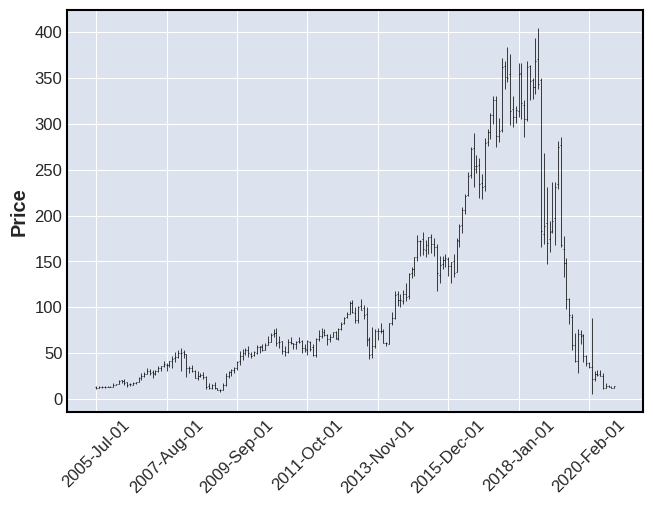

In [10]:
# plotting the given data for stock analysis
mpf.plot(df)

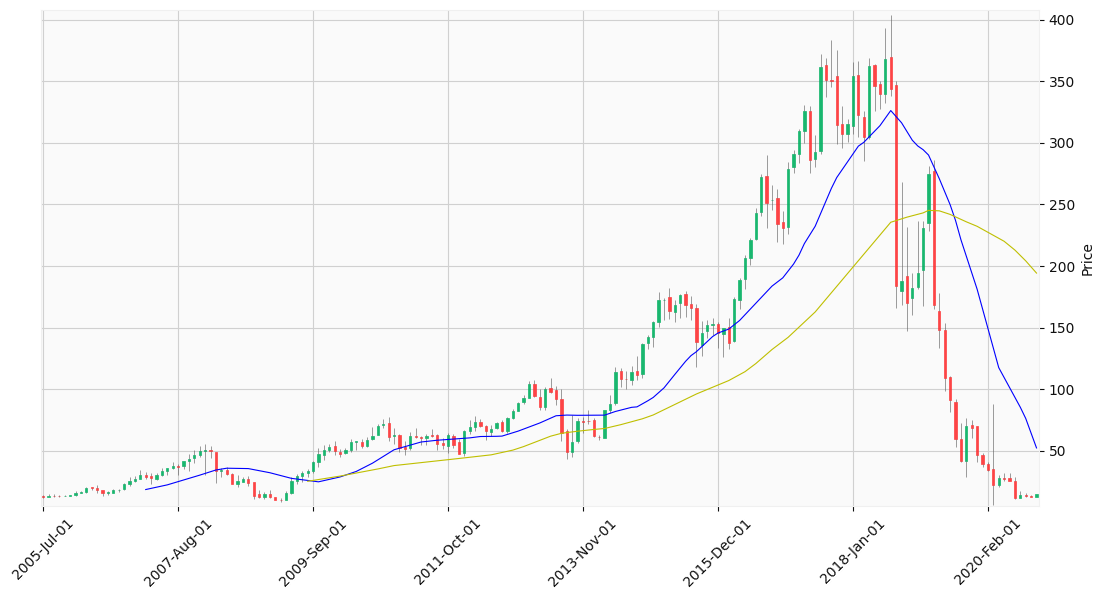

In [11]:
# Plotting the given data in candlestick pattern along with 20 and 50 monthly moving averages
mpf.plot(df,type='candle',
         mav=(20,50),style='yahoo',
         tight_layout= True,figratio =(48,24),
         mavcolors = ('b','y'))

Let's point the observation we took from this chart



*   Price was making higher highs since the inception until August 2018
*   We saw a triple top pattern forming between 350 to 400 price range, with neckline around 300 which indicates trend reversal

*   Price broke the neckline on September 2018 and attempted a failed retest on March 2019, which was a strong selling/shorting signal for traders.

*   We can see that 20 moving average(blue line) is a good good trading indicator for this chart as price rallied up when it was above it and also got suppresed, whenever the support broke
*   It can also be observed that price never spent too much time below 50 moving average and it ultimately always provided a good support for the stock until September 2018

*   At the time of retest on March 2019 for the neckline, the 20 moving average was also there which provided additional resistance to the price.
*   After failing to claim the 20 moving average support, the price further more dumped again, breaking the 50 moving average, thus there was no support confirmation for a bullish reversal








Let's have a look at the line graph of closing price of each month

In [12]:
# coding to get the line graph for close price
fig = px.line(df,y = 'Close',title='Yes Bank - Close price')
display(fig)

From this chart we can clearly see that the Bulls are getting exhausted in between July 2017 to July 2018 forming multiple tops inbetween 370 to 350 price point

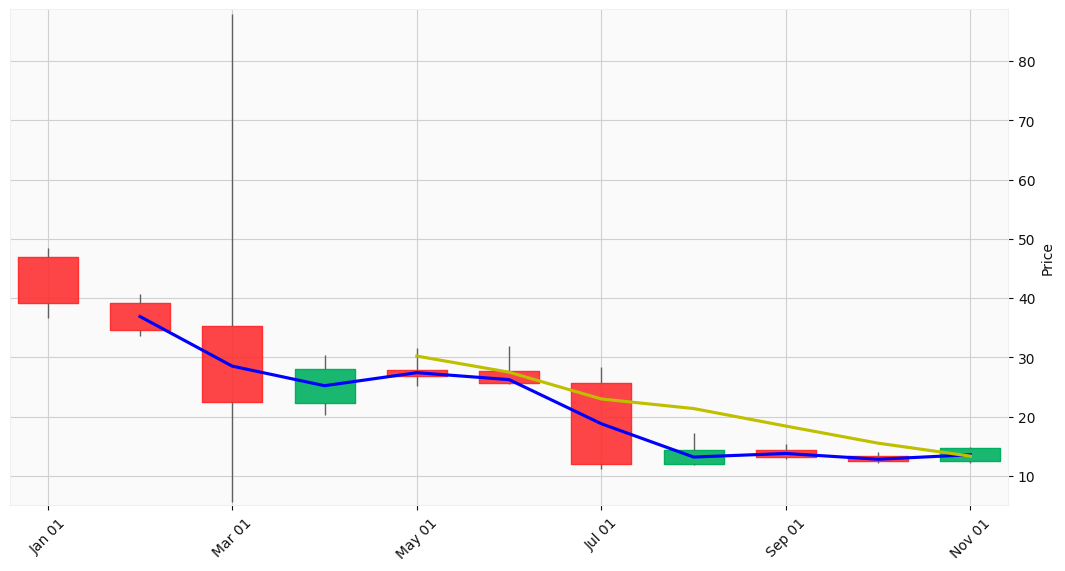

In [13]:
# Having a closer look at the price from 2020 till the end
mpf.plot(df['2020-01' : ],type='candle',
         mav=(2,5),style='yahoo',
         tight_layout= True,figratio =(48,24),
         mavcolors = ('b','y'))

We can see extreme volatility on March 2020, where the price spiked above 80 and also touched below 10, this coule be a result of market manipulation or due to some fundamental news in the market.

Although it can be observed tht market was forming its bottom around 10, having continous bounces from that support zone 

#Relative Strength Index

In [14]:
#setting up period for RSI
rsi_period = 14

#to calculate RSI, we first need to calculate the exponential weighted average gain and loss during the period
df['gain'] = (df['Close'] - df['Open']).apply(lambda x: x if x > 0 else 0)
df['loss'] = (df['Close'] - df['Open']).apply(lambda x: -x if x < 0 else 0)

#Now let's calculate the exponential moving average
df['ema_gain']=df['gain'].ewm(span=rsi_period,min_periods=rsi_period).mean()
df['ema_loss']=df['loss'].ewm(span=rsi_period,min_periods=rsi_period).mean()

# The relative strength is the ratio between exponetial average gain divided by the exponential average loss
df['rs'] = df['ema_gain']/df['ema_loss']

# The RSI is calculated using the relative strength by the following formula
df['rsi_14'] = 100 - (100/(df['rs'] + 1))

#plotting the RSI
fig = px.line(df,y ='rsi_14',title='RSI Indicator')

# adding oversold and overbought levels
overbought_level = 70
oversold_level = 30

#adding oversold and overbought levels to the plot
fig.add_hline(y=overbought_level, opacity = 0.5)
fig.add_hline(y=oversold_level,opacity = 0.5)

#Showing the RSI figure
display(fig)

We can see that in previos years selling and buying around RSI signal is profitable as it swings between 70 to 30

RSI and charts are suppose to move hand in hand, we can see that RSI top off on August 2016, but we saw our All time high on July 2017

Thus, this made a hidden bearish divergence in the chart which was continued till July 2018 after which the price colapsed.

#Average True Range

In [15]:
#defining ATR period
atr_period = 14

#calculating the range of each candle
df['range'] = df['High'] - df['Low']

#calculating the average value of the ranges 
df['atr_14'] = df['range'].rolling(atr_period).mean()

#plotting the ATR indicator
fig_atr = px.line(df,y='atr_14',title= 'ATR Indicator')
display(fig_atr)

We can check volatility using ATR

Few major spikes between 2018 till the end is observed  

#Bollinger Bands

In [16]:
# Adding the values for simple moving average in the data frame
def sma(data, window):
    sma = data.rolling(window = window).mean()
    return sma
df['sma_20'] = sma(df['Close'], 20)
df.tail()

,Open,High,Low,Close,gain,loss,ema_gain,ema_loss,rs,rsi_14,range,atr_14,sma_20
Date,,,,,,,,,,,,,
2020-07-01,25.60,28.30,11.10,11.95,0.00,13.65,3.196715,11.259636,0.283909,22.112874,17.20,27.796429,93.6725
2020-08-01,12.00,17.16,11.85,14.37,2.37,0.00,3.086486,9.758351,0.316292,24.029001,5.31,24.243571,85.3035
2020-09-01,14.30,15.34,12.75,13.15,0.00,1.15,2.674955,8.610571,0.310659,23.702525,2.59,22.367857,76.2460
2020-10-01,13.30,14.01,12.11,12.42,0.00,0.88,2.318294,7.579828,0.305850,23.421553,1.90,19.700000,65.3070
2020-11-01,12.41,14.90,12.21,14.67,2.26,0.00,2.310521,6.569184,0.351721,26.020247,2.69,17.635000,52.2880


In [17]:
#Calculation for bollinger bands
def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb
df['upper_bb'], df['lower_bb'] = bb(df['Close'], df['sma_20'], 20)
df.tail()

,Open,High,Low,Close,gain,loss,ema_gain,ema_loss,rs,rsi_14,range,atr_14,sma_20,upper_bb,lower_bb
Date,,,,,,,,,,,,,,,
2020-07-01,25.60,28.30,11.10,11.95,0.00,13.65,3.196715,11.259636,0.283909,22.112874,17.20,27.796429,93.6725,250.811870,-63.466870
2020-08-01,12.00,17.16,11.85,14.37,2.37,0.00,3.086486,9.758351,0.316292,24.029001,5.31,24.243571,85.3035,240.508729,-69.901729
2020-09-01,14.30,15.34,12.75,13.15,0.00,1.15,2.674955,8.610571,0.310659,23.702525,2.59,22.367857,76.2460,225.705570,-73.213570
2020-10-01,13.30,14.01,12.11,12.42,0.00,0.88,2.318294,7.579828,0.305850,23.421553,1.90,19.700000,65.3070,198.111610,-67.497610
2020-11-01,12.41,14.90,12.21,14.67,2.26,0.00,2.310521,6.569184,0.351721,26.020247,2.69,17.635000,52.2880,142.851323,-38.275323


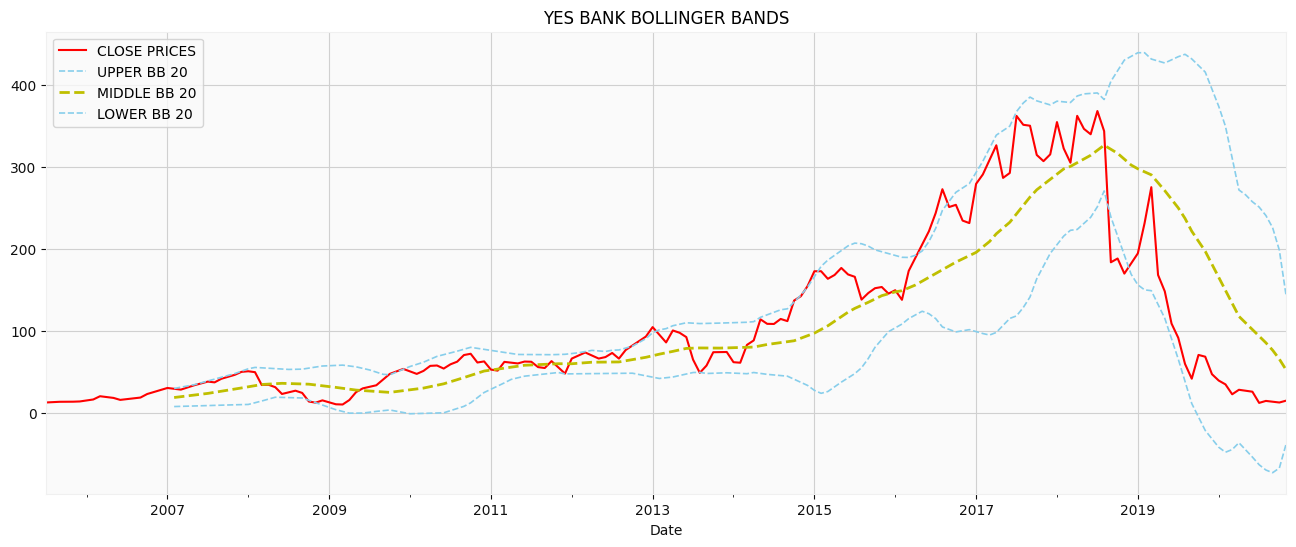

In [18]:
# Plotting boolinger bands indicator
plt.figure(figsize=(16,6))
df['Close'].plot(label = 'CLOSE PRICES', color = 'red')
df['upper_bb'].plot(label = 'UPPER BB 20', linestyle = '--', linewidth = 1.2, color = 'skyblue')
df['sma_20'].plot(label = 'MIDDLE BB 20', linestyle = '--', linewidth = 2, color = 'y')
df['lower_bb'].plot(label = 'LOWER BB 20', linestyle = '--', linewidth = 1.2, color = 'skyblue')
plt.legend(loc = 'upper left')
plt.title('YES BANK BOLLINGER BANDS')
plt.show()

We can see that lower and upper BB works as a support and resistance from time to time, so it is fair to trade inbetween them as the price always has a tendeny to come close to 20 moving average, if it deflects to much a bollinger squeeze is taking place.

We can also see that when the collapse of yesbank started, the price tanked from 375 to 169 but as the deviation was too much, a bollinger squeeze took place which pumped the price to 275, ultimately confirming it as a resistance before further collapse